In [2]:
# Packages we will use throughout this notebook
using Makie
using XLSX
using VegaDatasets
using DataFrames
using RDatasets
using StatsBase
using Statistics
using LinearAlgebra
using Plots
using ScikitLearn
using MLBase
using Distances

In [3]:
C = DataFrame(VegaDatasets.dataset("cars"))
dropmissing!(C)
M = Matrix(C[:,2:7])
car_origin = C[:,:Origin]
carmap = labelmap(car_origin) #from MLBase
uniqueids = labelencode(carmap,car_origin)
# center and normalize the data
data = M
data = (data .- mean(data,dims = 1))./ std(data,dims=1)


392×6 Matrix{Float64}:
 -0.697747   1.48205    1.07591    0.663285   0.619748   -1.28362
 -1.08212    1.48205    1.48683    1.57258    0.842258   -1.46485
 -0.697747   1.48205    1.18103    1.18288    0.539692   -1.64609
 -0.953992   1.48205    1.04725    1.18288    0.53616    -1.28362
 -0.82587    1.48205    1.02813    0.923085   0.554997   -1.82732
 -1.08212    1.48205    2.24177    2.42992    1.60515    -2.00855
 -1.21024    1.48205    2.48068    3.00148    1.62045    -2.37102
 -1.21024    1.48205    2.34689    2.87158    1.57101    -2.55226
 -1.21024    1.48205    2.49023    3.13138    1.70404    -2.00855
 -1.08212    1.48205    1.86908    2.22208    1.02709    -2.55226
 -1.08212    1.48205    1.80219    1.70248    0.689209   -2.00855
 -1.21024    1.48205    1.39127    1.44268    0.743365   -2.73349
 -1.08212    1.48205    1.96464    1.18288    0.922314   -2.18979
  ⋮                                                       ⋮
  0.199113   0.309571  -0.128168   0.143685  -0.0383613   0

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\tsakalos\.julia\conda\3

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    joblib-1.1.0               |     pyhd8ed1ab_0         210 KB  conda-forge
    m2w64-gcc-libgfortran-5.3.0|                6         342 KB  conda-forge
    m2w64-gcc-libs-5.3.0       |                7         520 KB  conda-forge
    m2w64-gcc-libs-core-5.3.0  |                7         214 KB  conda-forge
    m2w64-gmp-6.1.0            |                2         726 KB  conda-forge
    m2w64-libwinpthread-git-5.0.0.4634.697f757|                2          31 KB  conda-forge
    msys2-conda-epoch-20160418 |                1           3 KB  conda-forge
    scikit-learn-1.0.2         |   py39he931e04_0         6.9 MB  conda-forge
    scipy-1.7.3                |   py39hc0c34ad_0   

┌ Info: Installing sklearn via the Conda scikit-learn package...
└ @ PyCall C:\Users\tsakalos\.julia\packages\PyCall\L0fLP\src\PyCall.jl:711
┌ Info: Running `conda install -y scikit-learn` in root environment
└ @ Conda C:\Users\tsakalos\.julia\packages\Conda\1403Y\src\Conda.jl:129
┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall C:\Users\tsakalos\.julia\packages\PyCall\L0fLP\src\numpy.jl:67
C:\Users\tsakalos\.julia\conda\3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\tsakalos\.julia\conda\3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


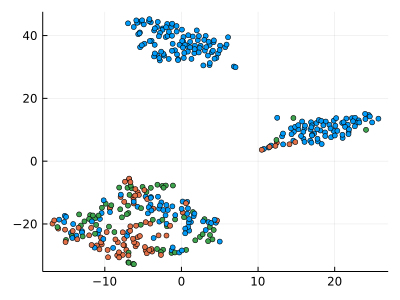

In [4]:

@sk_import manifold : TSNE
tfn = TSNE(n_components=2) #,perplexity=20.0,early_exaggeration=50)
Y2 = tfn.fit_transform(data);
Plots.scatter(Y2[:,1],Y2[:,2],color=uniqueids,legend=false,size=(400,300),markersize=3)